In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
# importing modules
import numpy as np
import pandas as pd

# setting option
pd.set_option('display.float_format', '{:.10f}'.format) # Displays up to 10 decimal places

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Percentiles

In [77]:
arr = np.array([10, 12, 14, 16, 18, 20, 100, 1, -8])
data = np.sort(arr)

# data distribution
print(f"Data: {data}")

# 25th percentile - linear interpolation
p25 = np.percentile(data, 25, method='linear')
print(f"Q1: {p25}")

# 50th percentile - linear interpolation
p50 = np.percentile(data, 50, method='linear')
print(f"Q2: {p50}")

# 75th percentile - linear interpolation
p75 = np.percentile(data, 75, method='linear')
print(f"Q3: {p75}")

# interquertile range
iqr = p75-p25
print(f"IQR: {iqr}")

# finding outliers
lower_bound = p25 - (1.5*iqr)
upper_bound = p75 + (1.5*iqr)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# outlier detection
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Outliers: {outliers}")

Data: [ -8   1  10  12  14  16  18  20 100]
Q1: 10.0
Q2: 14.0
Q3: 18.0
IQR: 8.0
Lower bound: -2.0
Upper bound: 30.0
Outliers: [ -8 100]


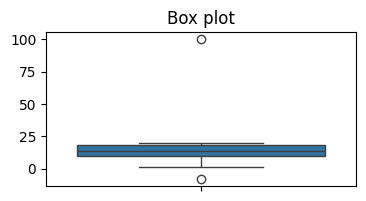

In [78]:
# Using box plot
fig, ax = plt.subplots(1,1, figsize=(4, 2))
ax.set_title("Box plot")
sns.boxplot(data)
plt.show()

### Normal Distrubution

In [79]:
np.random.seed(10)
original_data = np.random.normal(size=10000) # by default mean is zero and variance is 1
print(original_data)

[ 1.3315865   0.71527897 -1.54540029 ...  0.64737781  1.25073922
  1.1629442 ]


In [80]:
len(original_data)

10000

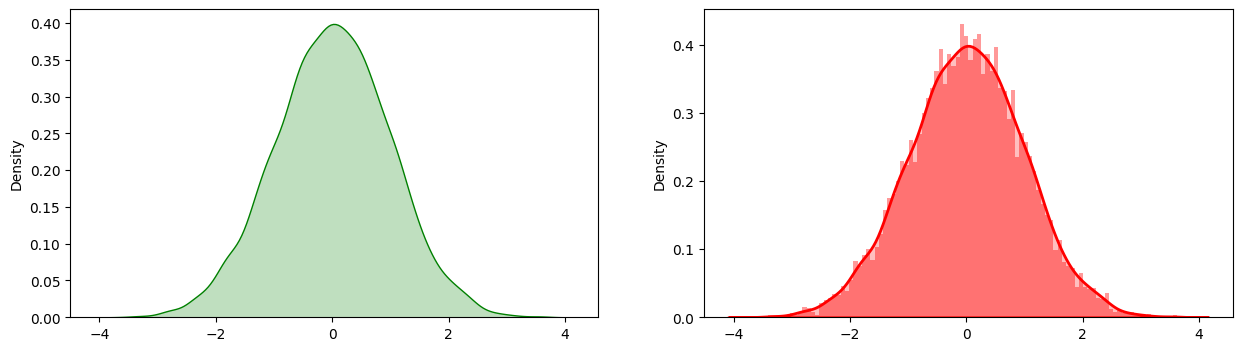

In [81]:
# creating axis to render subplots
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
sns.distplot(original_data, ax=ax[0], kde=True, kde_kws={'shade': True, 'linewidth': 1, }, color='green', hist=False)
sns.distplot(original_data, ax=ax[1], kde=True, hist=True, kde_kws= {'shade': True, 'linewidth': 2}, color='red', bins=100)

# rescaling the subplots
fig.set_figheight(4)
fig.set_figwidth(15)

plt.show()

### Mean, Median, Mode, Standard Deviation and Missing value imputation

In [82]:
data = pd.read_excel('titanic3.xls')

In [83]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000000000,0,0,24160,211.3375000000,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167000000,1,2,113781,151.5500000000,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000000000,1,2,113781,151.5500000000,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000000000,1,2,113781,151.5500000000,C22 C26,S,NaN,135.0000000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000000000,1,2,113781,151.5500000000,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [84]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.0000000000,1309.0000000000,1046.0000000000,1309.0000000000,1309.0000000000,1308.0000000000,121.0000000000
mean,2.2948815890,0.3819709702,29.8811345124,0.4988540871,0.3850267380,33.2954792813,160.8099173554
std,0.8378360190,0.4860551709,14.4134996999,1.0416583906,0.8655602753,51.7586682392,97.6969219960
min,1.0000000000,0.0000000000,0.1667000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
25%,2.0000000000,0.0000000000,21.0000000000,0.0000000000,0.0000000000,7.8958000000,72.0000000000
50%,3.0000000000,0.0000000000,28.0000000000,0.0000000000,0.0000000000,14.4542000000,155.0000000000
75%,3.0000000000,1.0000000000,39.0000000000,1.0000000000,0.0000000000,31.2750000000,256.0000000000
max,3.0000000000,1.0000000000,80.0000000000,8.0000000000,9.0000000000,512.3292000000,328.0000000000


In [85]:
# checking empty values
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [86]:
# null value percentage
round(data.isna().sum()*100/len(data))

pclass       0.0000000000
survived     0.0000000000
name         0.0000000000
sex          0.0000000000
age         20.0000000000
sibsp        0.0000000000
parch        0.0000000000
ticket       0.0000000000
fare         0.0000000000
cabin       77.0000000000
embarked     0.0000000000
boat        63.0000000000
body        91.0000000000
home.dest   43.0000000000
dtype: float64

In [87]:
# Drop columns with large empty values, and also name, ticket, cabin, boat as it is not important
data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [88]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.0000000000,1309.0000000000,1046.0000000000,1309.0000000000,1309.0000000000,1308.0000000000
mean,2.2948815890,0.3819709702,29.8811345124,0.4988540871,0.3850267380,33.2954792813
std,0.8378360190,0.4860551709,14.4134996999,1.0416583906,0.8655602753,51.7586682392
min,1.0000000000,0.0000000000,0.1667000000,0.0000000000,0.0000000000,0.0000000000
25%,2.0000000000,0.0000000000,21.0000000000,0.0000000000,0.0000000000,7.8958000000
50%,3.0000000000,0.0000000000,28.0000000000,0.0000000000,0.0000000000,14.4542000000
75%,3.0000000000,1.0000000000,39.0000000000,1.0000000000,0.0000000000,31.2750000000
max,3.0000000000,1.0000000000,80.0000000000,8.0000000000,9.0000000000,512.3292000000


In [89]:
data.describe(include='all')

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.0000000000,1309.0000000000,1309,1046.0000000000,1309.0000000000,1309.0000000000,1308.0000000000,1307
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,843,NaN,NaN,NaN,NaN,914
mean,2.2948815890,0.3819709702,NaN,29.8811345124,0.4988540871,0.3850267380,33.2954792813,NaN
std,0.8378360190,0.4860551709,NaN,14.4134996999,1.0416583906,0.8655602753,51.7586682392,NaN
min,1.0000000000,0.0000000000,NaN,0.1667000000,0.0000000000,0.0000000000,0.0000000000,NaN
25%,2.0000000000,0.0000000000,NaN,21.0000000000,0.0000000000,0.0000000000,7.8958000000,NaN
50%,3.0000000000,0.0000000000,NaN,28.0000000000,0.0000000000,0.0000000000,14.4542000000,NaN
75%,3.0000000000,1.0000000000,NaN,39.0000000000,1.0000000000,0.0000000000,31.2750000000,NaN


In [90]:
data.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [91]:
data.embarked.value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [92]:
data.embarked.fillna('S', inplace=True)

In [93]:
data.embarked.value_counts()

embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [94]:
print(f"Mean of age: {data.age.mean()}")
print(f"Median of age: {data.age.median()}")
print(f"Mode of age: {data.age.mode()}")
import statistics
age_variance = statistics.variance(data.age.dropna()) # filter missing values out
print(f"Variance of age: {age_variance}")
std_dev_age = statistics.sqrt(age_variance)
print(f"Standard deviation of age: {std_dev_age}")

Mean of age: 29.8811345124283
Median of age: 28.0
Mode of age: 0   24.0000000000
Name: age, dtype: float64
Variance of age: 207.7489735996977
Standard deviation of age: 14.4134996999236


<Axes: xlabel='age', ylabel='Density'>

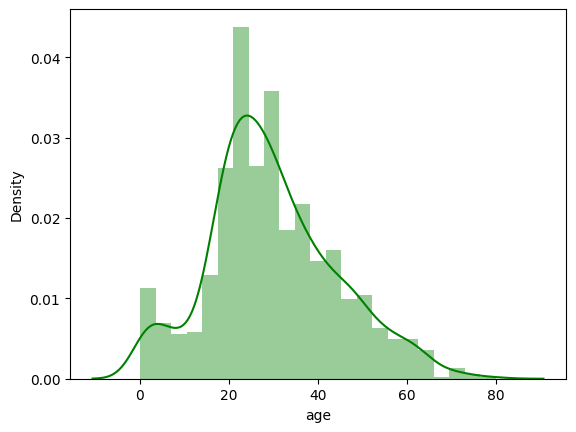

In [95]:
sns.distplot(data.age, kde=True, hist=True, color='green')

In [96]:
# Missing value imputed by median - mean is sensitive to outliers
print(f"Mean age before imputation: {data.age.mean()}")
data.age.fillna(data.age.median(), inplace=True)
print(f"Mean age after imputation: {data.age.mean()}")
print(data.isna().sum())

Mean age before imputation: 29.8811345124283
Mean age after imputation: 29.50318311688312
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64


<Axes: xlabel='age', ylabel='Density'>

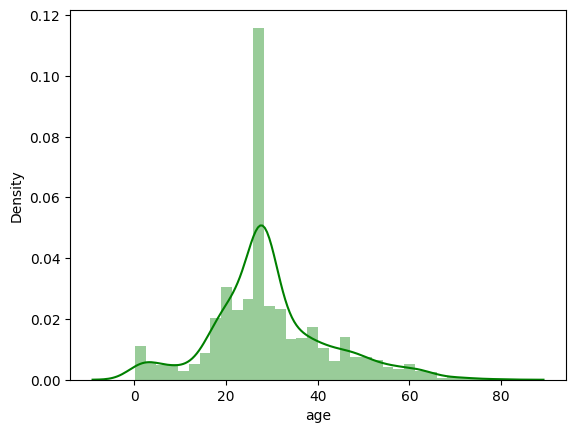

In [97]:
sns.distplot(data.age, kde=True, hist=True, color='green')

#### Another option:
    Drop columns with missing data  60%
    Fit regresison model to predict missing age data
    Always check accuracy of main task after imputation 
    Take business logic into consideration for data imputation

### Percentiles and outlier detection

In [98]:
original_data = pd.read_csv('Housing.csv')

In [99]:
data = original_data.loc[:, ['price', 'area']].copy(deep=True)

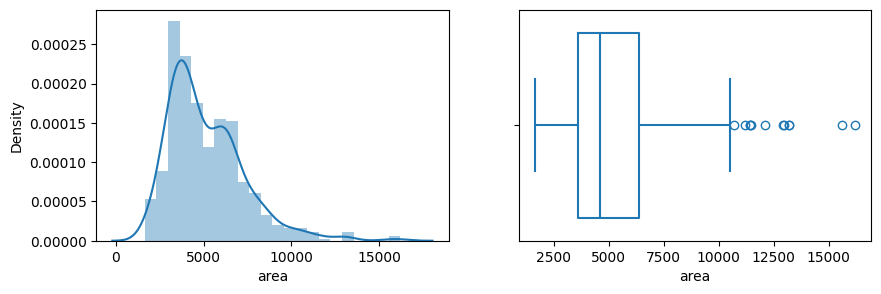

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(data.area, ax=ax[0])
sns.boxplot(x=data.area, fill=False, ax=ax[1])
plt.show()

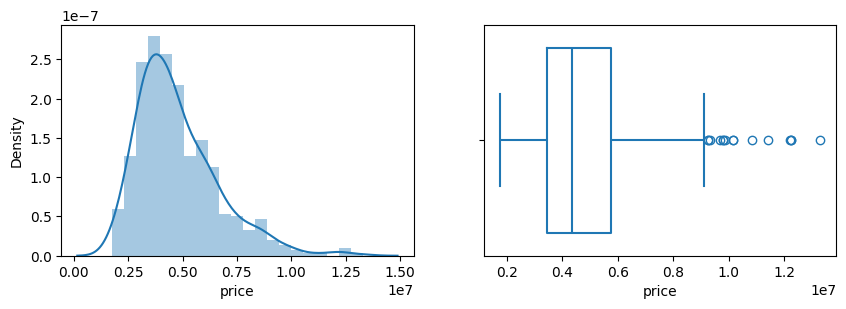

In [101]:
# visualizing percentiles and outliers
fig, ax = plt.subplots(1,2, figsize = (10,3))
sns.distplot(data.price, ax=ax[0])
sns.boxplot(x=data.price, fill=False, ax=ax[1])
plt.show()

In [102]:
# Statistical Mean
print(f"Mean price: {data.price.mean()}")
print(f"Mean area: {data.area.mean()}")

Mean price: 4766729.247706422
Mean area: 5150.54128440367


In [103]:
# Median and percentiles
# Area
print(f"Median area: {data.area.median()}")
ap25 = np.percentile(data.area, 25, method='linear')
print(f"Area Q1: {ap25}")
ap50 = np.percentile(data.area, 50, method='linear')
print(f"Area Q2: {ap50}")
ap75 = np.percentile(data.area, 75, method='linear')
print(f"Area Q3: {ap75}")
a_iqr = ap75-ap25
print(f"Area IQR : {a_iqr}")

ap_lb = ap25 - (1.5 * a_iqr)
ap_ub = ap75 + (1.5 * a_iqr)

print(f"Area lower bound: {ap_lb}")
print(f"Area upper bound: {ap_ub}")

# Removing outliers
outliers = (data.area >= ap_lb) & (data.area <= ap_ub)
data = data[outliers]

Median area: 4600.0
Area Q1: 3600.0
Area Q2: 4600.0
Area Q3: 6360.0
Area IQR : 2760.0
Area lower bound: -540.0
Area upper bound: 10500.0


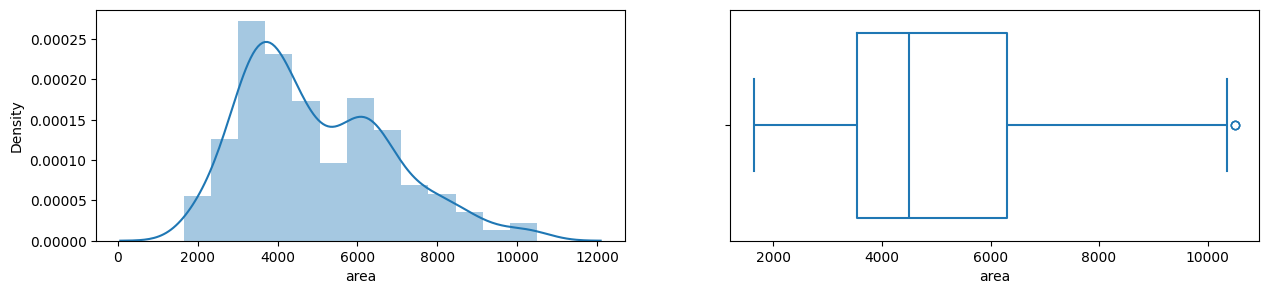

In [104]:
# visualizing area distribution after removing outliers
fig, ax = plt.subplots(1,2, figsize = (15,3))
sns.distplot(data.area, ax=ax[0])
sns.boxplot(x=data.area, fill=False, ax=ax[1])
plt.show()

### Data Normalization

In [105]:
data.describe()

,price,area
count,533.0000000000,533.0000000000
mean,4726995.1969981240,4980.7242026266
std,1851250.7739415988,1855.2650736058
min,1750000.0000000000,1650.0000000000
25%,3430000.0000000000,3540.0000000000
50%,4305000.0000000000,4500.0000000000
75%,5652500.0000000000,6300.0000000000
max,13300000.0000000000,10500.0000000000


###
    Min-Max Scaling

In [106]:
# importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=['price', 'area'])
data_scaled.head()

,price,area
0,1.0000000000,0.6519774011
1,0.9090909091,0.8259887006
2,0.9090909091,0.9389830508
3,0.9060606061,0.6610169492
4,0.8363636364,0.6519774011


###
    If notice carefully, all values are now between 0 and 1

In [108]:
data_scaled.describe()

,price,area
count,533.0000000000,533.0000000000
mean,0.2577485019,0.3763530172
std,0.1602814523,0.2096344716
min,0.0000000000,0.0000000000
25%,0.1454545455,0.2135593220
50%,0.2212121212,0.3220338983
75%,0.3378787879,0.5254237288
max,1.0000000000,1.0000000000


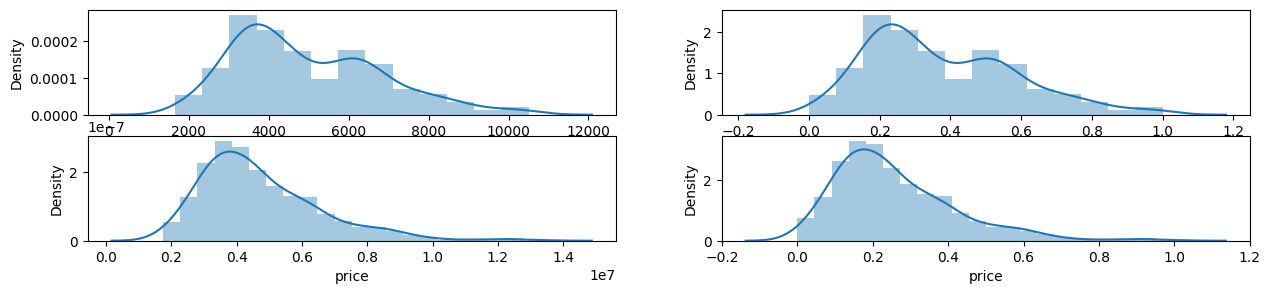

In [109]:
# visualizing after scaling
fig, ax = plt.subplots(2,2, figsize = (15,3))
sns.distplot(data.area, ax=ax[0][0])
sns.distplot(data_scaled.area, ax=ax[0][1])
sns.distplot(data.price, ax=ax[1][0])
sns.distplot(data_scaled.price, ax=ax[1][1])
plt.show()

###
    Z-Score Normalization

In [110]:
# importing libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=['price', 'area'])
data_scaled.head()

,price,area
0,4.6352760395,1.3160207176
1,4.0675591242,2.1468705572
2,4.0675591242,2.6863834401
3,4.0486352270,1.3591817482
4,3.6133855920,1.3160207176


#
    If noticed carefully, mean is 0 and standard deviation is 1

In [111]:
data_scaled.describe()

,price,area
count,533.0000000000,533.0000000000
mean,-0.0000000000,0.0000000000
std,1.0009394084,1.0009394084
min,-1.6096100286,-1.7969686167
25%,-0.7012629642,-0.7772892680
50%,-0.2281655348,-0.2593569004
75%,0.5004045065,0.7117662888
max,4.6352760395,2.9777203969


### Correlation
    Using non scaled price and area

In [112]:
data.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


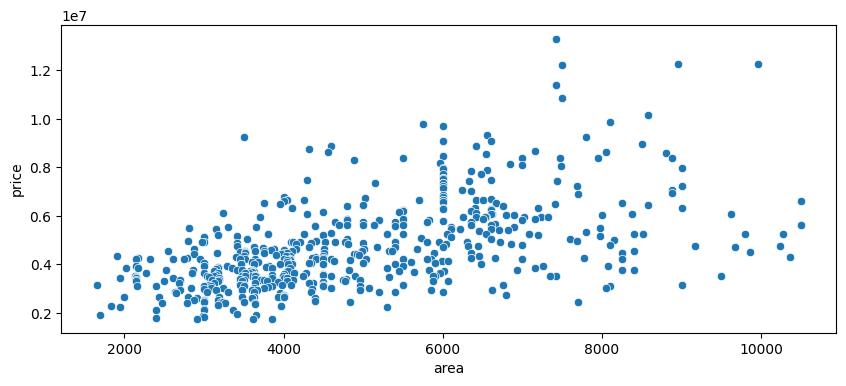

In [138]:
fig, ax = plt.subplots(1,1, figsize = (10, 4))
sns.scatterplot(data=data, x='area', y='price')
plt.show()

#
    Correlation using heatmap

<table>
<tr><th>Lower</th><th>Upper</th><th>Degree</th></tr>
<tr><td>0</td><td></td><td>No Correlation</td></tr>
<tr><td>-0.3</td><td>0.3</td><td>Week</td></tr>
<tr><td>-0.7</td><td>-0.3</td><td>Moderate Negative</td></tr>
<tr><td>0.3</td><td>0.7</td><td>Moderate Positive</td></tr>
<tr><td>-1</td><td>-0.7</td><td>Strong Negative</td></tr>
<tr><td>0.7</td><td>1</td><td>Strong Positive</td></tr>
<tr><td></td><td>1</td><td>Perfect Correlation</td></tr>
</table>

Since Pearson's correlation coefficient is between 0.3 and 0.7
</br>
therefore, its a moderate correlation

In [129]:
crr = data[['price', 'area']].corr()
crr

,price,area
price,1.0000000000,0.5498978515
area,0.5498978515,1.0000000000


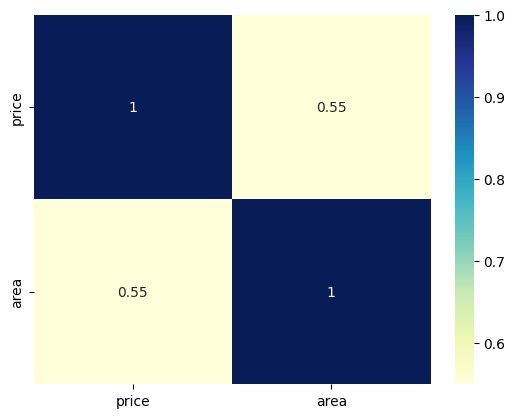

In [118]:
sns.heatmap(data[['price', 'area']].corr(), cmap="YlGnBu", annot=True)
plt.show()